In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
movies = pd.read_csv('src/data.csv')
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

Removing all movies with rating of 0.0 because they only have 0 or 1 votes

In [6]:
counts = movies[(movies['vote_average'] == 0)]['vote_count'] # get vote counts for all movies that have a rating of 0.0
print("Unique vote counts for movies with 0.0 rating")
for u in set(counts):
    print(u)
movies = movies[(movies['vote_average'] != 0)]

Unique vote counts for movies with 0.0 rating
0
1


Convert json columns to list

In [7]:
def to_list(df, feature_names_list): #df: dataframe, feature_names: list of all features to convert from JSON to list
    for feature_name in feature_names_list:
        print("Current:", feature_name)
        #STEP 1: convert JSON format to a list
        df[feature_name] = df[feature_name].apply(json.loads)         
        for index, i in zip(df.index, df[feature_name]):
            feature_list_1 = []
            for j in range(len(i)):
                feature_list_1.append((i[j]['name']))
            df.loc[index, feature_name]= str(feature_list_1)
    
        #STEP 2: clean up and transform into unsorted list
        df[feature_name] = df[feature_name].str.strip('[]').str.replace(' ','').str.replace("'",'')
        df[feature_name] = df[feature_name].str.split(',')
        
        #STEP 3: Sort list elements
        for i, j in zip(df[feature_name], df.index):
            features_list_2=i
            features_list_2.sort()
            df.loc[j,feature_name]=str(features_list_2)
        df[feature_name]=df[feature_name].str.strip('[]').str.replace(' ','').str.replace("'",'')
        lst = df[feature_name].str.split(',')
        if len(lst) == 0:
            df[feature_name] = None
        else:
            df[feature_name]= df[feature_name].str.split(',')
    return df

In [8]:
movies = to_list(movies, ['genres', 'keywords', 'production_companies', 'production_countries'])

Current: genres


Current: keywords
Current: production_companies
Current: production_countries


In [9]:
movies.sample(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
844,55000000,"[Action, Crime, Drama, Thriller]",NaN,10632,"[balkanwar, combat, darkpast, exsoldier, fbi, ...",en,The Hunted,"In the wilderness of British Columbia, two hun...",8.634954,"[AlphavilleFilms, LakeshoreEntertainment]",[UnitedStatesofAmerica],2003-03-11,34234008,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some men should not be found.,The Hunted,6.0,189
4136,0,"[Crime, Drama, Thriller]",NaN,12612,"[alibi, camcorder, lossoffamily, murder, suspect]",en,Freeze Frame,Sean Veil is an ultra paranoid murder suspect ...,4.922397,[],"[Ireland, UnitedKingdom]",2004-05-01,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Freeze Frame,6.9,18
470,85000000,"[Drama, Fantasy, Romance]",NaN,12159,"[afterlife, heaven, hell, painting, paradise, ...",en,What Dreams May Come,Chris Neilson dies to find himself in a heaven...,21.891078,[PolyGramFilmedEntertainment],"[NewZealand, UnitedStatesofAmerica]",1998-10-02,71485043,113.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,After life there is more. The end is just the ...,What Dreams May Come,6.8,577
2122,20000000,"[Action, Adventure, Comedy]",NaN,9760,[],en,Epic Movie,"When Edward, Peter, Lucy and Susan each follow...",6.064638,"[NewRegencyPictures, PaulSchiffProductions, Re...",[UnitedStatesofAmerica],2007-01-25,86865564,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,We know it's big. We measured.,Epic Movie,3.2,326
124,150000000,"[Adventure, Animation, Family]",http://movies.disney.com/frozen,109445,"[3d, aftercreditsstinger, animation, betrayal,...",en,Frozen,Young princess Anna of Arendelle dreams about ...,165.125366,"[WaltDisneyAnimationStudios, WaltDisneyPictures]",[UnitedStatesofAmerica],2013-11-27,1274219009,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Only the act of true love will thaw a frozen h...,Frozen,7.3,5295


In [10]:
to_drop = []
for i in movies.index:
    if (movies['production_companies'][i] == [''] and movies['production_countries'][i] == ['']):
        to_drop.append(i)
print('Dropping', str(len(to_drop)), 'movies.')
movies = movies.drop(to_drop, axis = 0)

Dropping 127 movies.


In [11]:
movies.shape

(4613, 20)

Keeping only columns that could impact on prediction

In [12]:
movies_shortened = movies[['id','original_title','genres','production_companies', 'production_countries', 'keywords', 'popularity', 'revenue', 'runtime', 'vote_average']]
movies_shortened.sample(10)

,id,original_title,genres,production_companies,production_countries,keywords,popularity,revenue,runtime,vote_average
1059,9360,Anaconda,"[Adventure, Horror, Thriller]","[CinemaLineFilmCorporation, ColumbiaPicturesCo...","[Brazil, Peru, UnitedStatesofAmerica]","[amazon, amazonriver, anaconda, animalhorror, ...",27.684779,136885767,89.0,4.7
264,8489,Ali,[Drama],[ColumbiaPicturesCorporation],[UnitedStatesofAmerica],"[biography, boxer, muhammad, transporter, usa]",18.866672,87713825,157.0,6.7
2608,7874,Black Snake Moan,[Drama],[ParamountClassics],[UnitedStatesofAmerica],"[blues, independentfilm, militaryservice, sout...",11.429607,10903846,116.0,6.6
3230,14353,Repo! The Genetic Opera,"[Comedy, Horror, Music, ScienceFiction]","[LionsGateFilms, TwistedPictures]",[UnitedStatesofAmerica],[dystopia],5.897479,188126,98.0,6.7
2542,15765,What's Love Got to Do with It,"[Drama, Music]",[TouchstonePictures],[UnitedStatesofAmerica],"[africanamericanmusic, blackfamily, blackwoman...",7.921311,0,118.0,6.9
869,1819,"You, Me and Dupree","[Comedy, Romance]","[Kaplan/PerroneEntertainment, MMCBFilmProdukti...",[UnitedStatesofAmerica],"[""loveofoneslife"", newlywed, roommate]",18.600367,130431368,108.0,5.4
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[DuneEntertainment, IngeniousFilmPartners, Lig...","[UnitedKingdom, UnitedStatesofAmerica]","[3d, alien, alienplanet, antiwar, battle, cgi,...",150.437577,2787965087,162.0,7.2
3769,10132,Talk Radio,[Drama],"[Cineplex-OdeonFilms, Ten-FourProductions]","[Canada, UnitedStatesofAmerica]","[anonymity, dangerous, independentfilm, radiop...",4.541908,3468572,110.0,6.7
3861,1667,La Marche de l'empereur,"[Documentary, Family]","[""LInstitutPolareFrançaisPaul-ÉmileVictor"", Al...",[France],"[antarctic, autonomy, brood, egg, parentskidsr...",17.537154,127392239,80.0,6.9
433,146216,RED 2,"[Action, Comedy, Crime, Thriller]","[DCComics, DCEntertainment, DiBonaventuraPictu...","[Canada, France, UnitedStatesofAmerica]","[cia, explodingairplane, hiredkiller, londonen...",44.343330,0,116.0,6.4


Visualizing vote rating distribution and basic stats

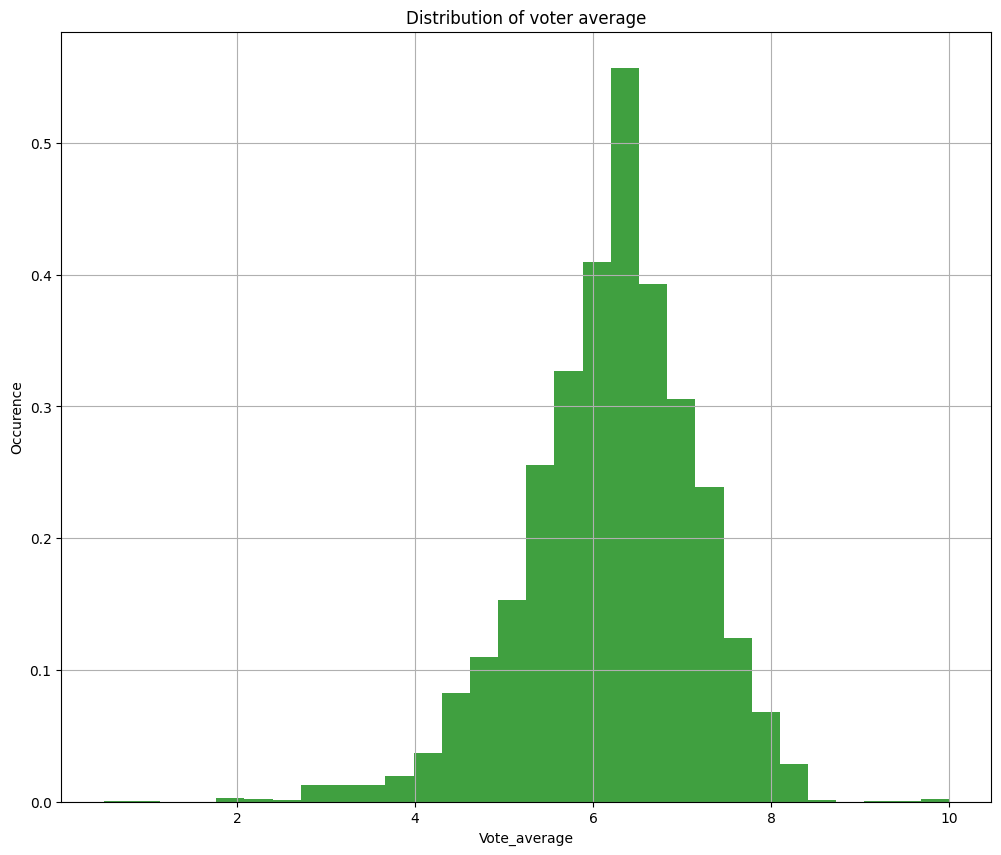

Minimum of Ratings: 0.5
Maximum of Ratings: 10.0
Average of Ratings: 6.19
Variance of Ratings: 0.9


In [13]:
plt.subplots(figsize=(12,10))
n, bins, patches = plt.hist(movies_shortened['vote_average'], 30, density=1, facecolor='g', alpha=0.75)

plt.xlabel('Vote_average')
plt.ylabel('Occurence')
plt.title('Distribution of voter average')
plt.grid(True)
plt.show()
print("Minimum of Ratings:", round(min(movies_shortened['vote_average']),2))
print("Maximum of Ratings:", round(max(movies_shortened['vote_average']),2))
print("Average of Ratings:", round(np.mean(movies_shortened['vote_average']),2))
print("Variance of Ratings:",round(np.var(movies_shortened['vote_average']),2))

Feature Engineering: Turn lists of features into numerical representations. Step 1: Identify all unique sub-feature for each feature.Organize sub-features to lowest-rating association to highest-rating association.
By organizing features in this order, the numerical representation will then also describe the quality of features associated with the movie.
Higher quality feature values should correlate with higher-rated movies, and vice versa.


In [14]:
def generate_list(df, feature_name): #create a list of all unique feature values
    #Step 1: track all ratings associated with each feature in a dictionary
    feature_dict = {}
    for index, row in df.iterrows():
        feat = row[feature_name]
        for sub_feat in feat:
            if sub_feat not in feature_dict:
                feature_dict[sub_feat] = (df['vote_average'][index], 1) #
            else:
                feature_dict[sub_feat] = (feature_dict[sub_feat][0] + (df['vote_average'][index]), feature_dict[sub_feat][1] + 1)
    #Step 2: calculate average ratings for each feature
    for key in feature_dict:
        feature_dict[key] = feature_dict[key][0]/feature_dict[key][1] #average of all vote_averages
       
    #Step 3: create and sort a list of tuples (dictionary value, key)
    lst = list()
    for name in feature_dict:
        lst.append((feature_dict[name],name))
    lst = sorted(lst)
    #step 4: create a list of only the feature names, from lowest rating to highest rating
    feature_list = list()
    ratings_list = list()
    for element in lst:
        feature_list.append(element[1])
        ratings_list.append(element[0])
    
    #get the variance of the ratings. This is helpful for determining the usefulness of the information (to be displayed in below plot)
    var = round(np.var(ratings_list),3)
    
    #before returning the list, do a quick visualization to show that generate_list works
    fig, ax = plt.subplots(figsize=(6,5))
    if feature_name != 'genres' and feature_name != 'production_countries':
        n = 50 # sample at intervals of n
    else:
        n = 1
    X = [] #sample for associated movie(s) rating average
    Y = [] #sample for feature names
    for i in range(0, len(feature_list) - 1, n):
        X.append(ratings_list[i])
        Y.append(feature_list[i])
    
    y_pos = np.arange(len(Y))
    ax.barh(y_pos, X, align='center')
    #ax.set_yticklabels(Y)
    ax.invert_yaxis()  # labels read top-to-bottom
    
    ax.set_xlabel('Overall average movie ratings')
    ax.set_ylabel(feature_name + ' sample list index')
    ax.set_title(feature_name + ' to associated movie(s) performance (' + str(int(len(feature_list)/n)) + ' samples), variance: ' + str(var))
    
    plt.show()
    
    return feature_list

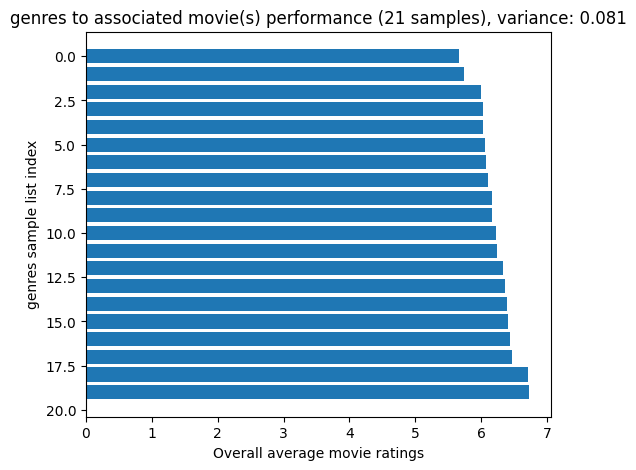

In [15]:
genres_list = generate_list(movies_shortened, 'genres')

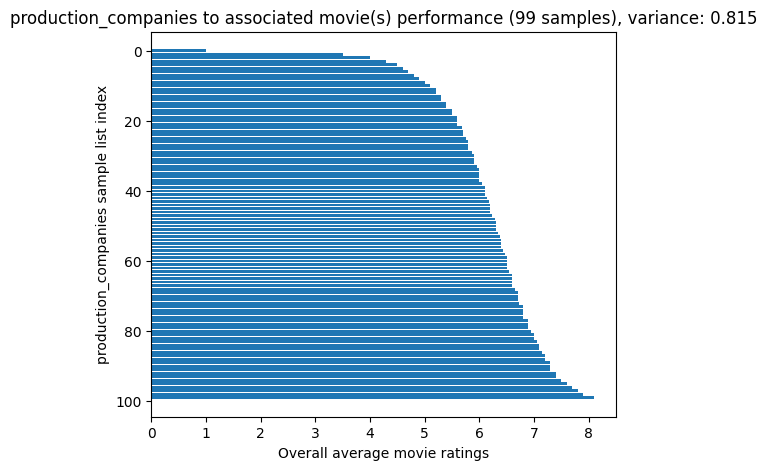

In [16]:
prod_companies_list = generate_list(movies_shortened, 'production_companies')

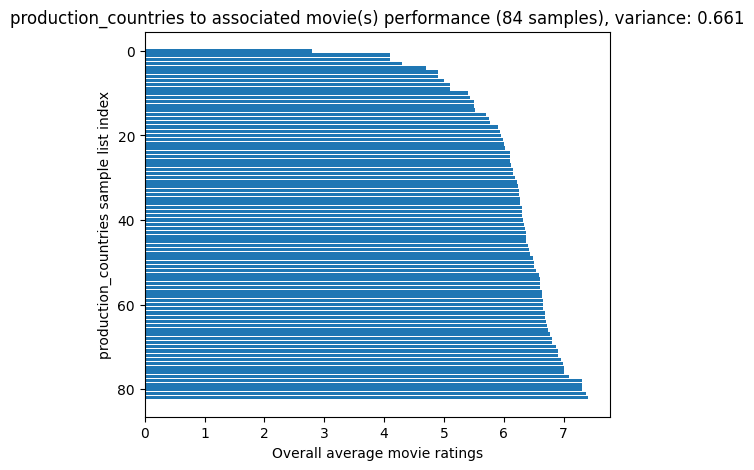

In [17]:
prod_countries_list = generate_list(movies_shortened, 'production_countries')

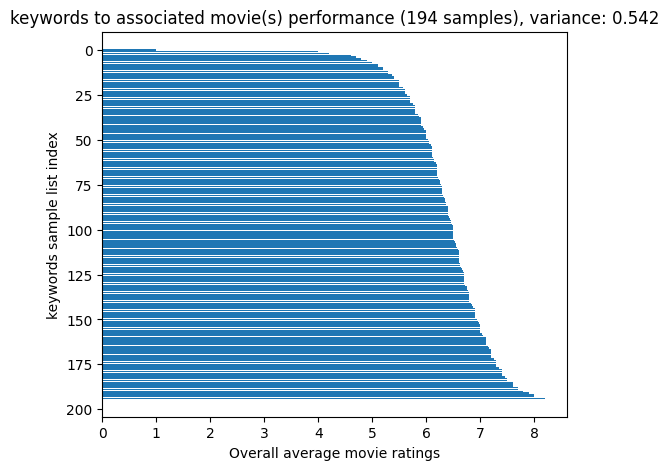

In [18]:
keywords_list = generate_list(movies_shortened, 'keywords')

In [19]:
correlation_popularity = movies_shortened['vote_average'].corr(movies_shortened['popularity'])

print(f"Correlation between vote_average and popularity: {correlation_popularity}")

Correlation between vote_average and popularity: 0.28258875138474476


In [20]:
correlation_runtime = movies_shortened['vote_average'].corr(movies_shortened['runtime'])

print(f"Correlation between vote_average and runtime: {correlation_runtime}")

Correlation between vote_average and runtime: 0.35164398155032967


Keeping only correlated columns

In [21]:
movies_shortened = movies_shortened[['id', 'original_title', 'production_companies', 'production_countries', 'keywords', 'vote_average']]

In [22]:
movies_shortened.sample(5)

,id,original_title,production_companies,production_countries,keywords,vote_average
1970,10358,Zack and Miri Make a Porno,"[BlueAskew, ViewAskewProductions]",[UnitedStatesofAmerica],"[""loveofoneslife"", aftercreditsstinger, bestfr...",6.1
3631,1024,Heavenly Creatures,"[FontanaProductions, MiramaxFilms, NewZealandF...",[NewZealand],"[fantasy, friends, independentfilm, lesbian, l...",7.0
3783,157847,Joe,"[DreambridgeFilms, MuskatFilmedProperties, Rou...",[UnitedStatesofAmerica],"[alcoholic, assaultinganofficer, bar, beer, br...",6.5
3844,89540,La otra conquista,[],[Mexico],"[aztecindian, femalenudity, pagan]",5.4
4590,157909,Show Me,"[FeatureFilmProject, RedPlushFilms]","[Canada, UnitedStatesofAmerica]",[kidnapping],5.6


Create a binary representation for each feature
Using the lists created, create binary arrays that indicated whether or not feature_name can be found in this movie
note: each array represents a feature associated with movies with lowest average ratings to highest average ratings

this is useful because we can use the array as a gauge for how well the features track record in movies are

In [23]:
def calculate_bin_array(this_list, all_features):
    bin_list = []
    for element in all_features:
        if element in this_list:
            bin_list.append(1)
        else:
            bin_list.append(0)
    return bin_list

In [24]:
movies_shortened['production_companies'] = movies_shortened['production_companies'].apply(lambda x: calculate_bin_array(x, prod_companies_list))

In [25]:
movies_shortened['production_countries'] = movies_shortened['production_countries'].apply(lambda x: calculate_bin_array(x, prod_countries_list))

In [26]:
movies_shortened['keywords'] = movies_shortened['keywords'].apply(lambda x: calculate_bin_array(x, keywords_list))

In [27]:
def plot_bin(mov):
    prod_bin = mov[2]
    prod_index = []
    for i in range(len(prod_bin)):
        if prod_bin[i] == 1:
            prod_index.append(i)

    country_bin = mov[3]
    country_index = []
    for i in range(len(country_bin)):
        if country_bin[i] == 1:
            country_index.append(i)
    
    keywords_bin = mov[4]
    keywords_index = []
    for i in range(len(keywords_bin)):
        if keywords_bin[i] == 1:
            keywords_index.append(i)
    
    font = {'family': 'serif',
        'color':  'red',
        'weight': 'normal',
        'size': 10,
        }
    
    fig, ax = plt.subplots(3,1,figsize=(5,1))
    plt.subplots_adjust(hspace = 5)       
    ax[0].scatter(prod_index, np.zeros_like(prod_index), vmin=-2)
    ax[0].set_title('Production companies', loc = 'left', fontdict=font)
    ax[0].set_xlim(0,len(prod_bin))
    ax[0].set_yticks([])
    ax[0].set_xticks([])

    ax[1].scatter(country_index, np.zeros_like(country_index), vmin=-2)
    ax[1].set_title('Country', loc = 'left', fontdict=font)
    ax[1].set_xlim(0,len(country_bin))
    ax[1].set_yticks([])
    ax[1].set_xticks([])
    
    ax[2].scatter(keywords_index, np.zeros_like(keywords_index), vmin=-2)
    ax[2].set_title('Keywords', loc = 'left', fontdict=font)
    ax[2].set_xlim(0,len(keywords_bin))
    ax[2].set_yticks([])
    ax[2].set_xticks([])

In [28]:
movies_sample = movies_shortened.sample(5)

Movie: The DUFF
Rating: 6.8



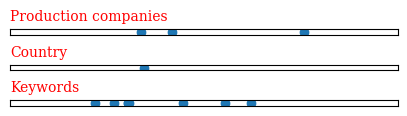

In [29]:
print('Movie: ' + movies_sample.iloc[0][1] + '\nRating: ' + str(movies_sample.iloc[0][-1]) + '\n')
plot_bin(movies_sample.iloc[0])

Movie:Broken Arrow
Rating: 5.7



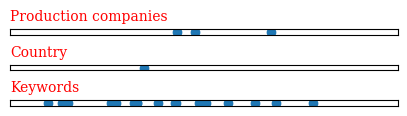

In [30]:
print('Movie:' + movies_sample.iloc[1][1] + '\nRating: ' + str(movies_sample.iloc[1][-1]) + '\n')
plot_bin(movies_sample.iloc[1])

Movie:Dear Frankie
Rating: 7.0



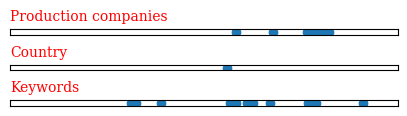

In [31]:
print('Movie:' + movies_sample.iloc[2][1] + '\nRating: ' + str(movies_sample.iloc[2][-1]) + '\n')
plot_bin(movies_sample.iloc[2])

Movie:Mad Max: Fury Road
Rating: 7.2



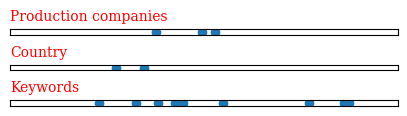

In [32]:
print('Movie:' + movies_sample.iloc[3][1] + '\nRating: ' + str(movies_sample.iloc[3][-1]) + '\n')
plot_bin(movies_sample.iloc[3])

Movie:Snow Day
Rating: 4.8



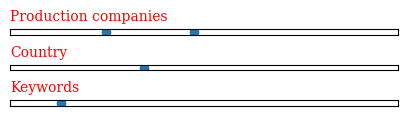

In [33]:
print('Movie:' + movies_sample.iloc[4][1] + '\nRating: ' + str(movies_sample.iloc[4][-1]) + '\n')
plot_bin(movies_sample.iloc[4])

Analysis:
Movies with lower ratings have features leaning towards the left, while movies with higher ratings have features leaning to the right.
This shows that there's a relationship between features and ratings if feature names is organized from lowest movie rating associations to highest movie rating associations

Find concentration points in each array.
Find areas where numbers are grouped, and identify points that resemble the centers of binary distribution

Generic example: [1110001111100101] -> [0300000050000020] -> [(1,3), (8,5), (14,2)] tuple[0] is the index of concentration, tuple[1] is the number of 1's about index

In [34]:
def split_arr(arr, n_splits): 
      
    # looping till length l 
    for i in range(0, len(arr), n_splits):  
        yield arr[i:i + n_splits] 

def find_concentration(arr, n = 80): # n is the number of concentration points to find
    #seperate array into batches
    batches = list(split_arr(arr,int(len(arr)/n)))
    concentrations = []
    for i in range(len(batches)):
        point = 0
        num_ones = 0
        for j in range(len(batches[i])):
            if batches[i][j] == 1:
                point += j + (i * int(len(arr)/n)) # adding correction for batches
                num_ones += 1
        if num_ones > 0:
            point = point/num_ones
            concentrations.append((point,num_ones))
    return concentrations

In [35]:
def to_concentrations(df, feature_names):
    for feature_name in feature_names:
        print('feature: ', feature_name)
        df[feature_name] = df[feature_name].apply(lambda x: find_concentration(x))
    return df

In [36]:
movies_shortened = to_concentrations(movies_shortened, ['production_companies', 'production_countries', 'keywords'])

feature:  production_companies
feature:  production_countries
feature:  keywords


In [37]:
movies_shortened.head()

,id,original_title,production_companies,production_countries,keywords,vote_average
0,19995,Avatar,"[(1632.0, 1), (1880.0, 1), (2156.0, 1), (4441....","[(29.0, 1), (47.0, 1)]","[(2214.0, 1), (2535.0, 1), (2622.0, 1), (3186....",7.2
1,285,Pirates of the Caribbean: At World's End,"[(2585.5, 2), (4005.0, 1)]","[(29.0, 1)]","[(1840.0, 1), (3568.0, 1), (3738.0, 1), (3777....",6.9
2,206647,Spectre,"[(2147.0, 1), (2422.0, 1), (3157.0, 1)]","[(29.0, 1), (47.0, 1)]","[(2235.0, 2), (3564.0, 2), (4204.5, 2), (5932....",6.3
3,49026,The Dark Knight Rises,"[(2634.0, 1), (2913.0, 1), (2915.0, 1), (4660....","[(29.0, 1)]","[(1230.0, 1), (1927.0, 1), (2226.0, 1), (2908....",7.6
4,49529,John Carter,"[(2590.0, 1)]","[(29.0, 1)]","[(687.0, 1), (1231.0, 1), (2150.0, 1), (2622.0...",6.1


In [38]:
movies_shortened.sample(10)

,id,original_title,production_companies,production_countries,keywords,vote_average
2236,82684,Chasing Mavericks,"[(2106.0, 1), (2362.0, 1)]","[(29.0, 1)]","[(3483.0, 1), (3682.0, 1), (5923.0, 1), (7050....",7.0
179,270946,Penguins of Madagascar,"[(3181.0, 1)]","[(29.0, 1)]","[(1227.0, 1), (3186.0, 1), (4270.0, 1)]",6.5
2209,18885,3 Ninjas Kick Back,"[(205.5, 2), (2097.0, 1)]","[(29.0, 1), (40.0, 1)]","[(132.5, 2), (568.0, 1), (937.0, 1), (1016.0, ...",4.5
3702,27686,State Fair,"[(2156.0, 1)]","[(29.0, 1)]","[(3474.0, 1)]",6.2
470,12159,What Dreams May Come,"[(2846.0, 1)]","[(29.0, 1), (66.0, 1)]","[(2140.0, 1), (4269.0, 1), (4868.5, 2), (5329....",6.8
3998,9730,Friday the 13th: The Final Chapter,"[(1091.0, 1), (1519.0, 1), (2363.0, 1)]","[(29.0, 1)]","[(474.0, 1), (1484.0, 1), (2197.0, 1), (2646.0...",5.9
133,62213,Dark Shadows,"[(1137.0, 1), (1254.0, 1), (1884.0, 1), (2094....","[(23.0, 1), (29.0, 1)]","[(1037.0, 1), (1325.0, 1), (1391.0, 3), (1767....",5.7
864,36586,Blade II,"[(1898.5, 2), (2102.0, 1), (2134.0, 1), (2263....","[(29.0, 1), (35.0, 1)]","[(1268.0, 1), (1535.0, 1), (1767.0, 1), (1825....",6.2
2369,130150,Labor Day,"[(3603.0, 1), (4143.0, 1), (4429.0, 1)]","[(29.0, 1)]","[(3760.0, 1), (6266.0, 1)]",6.7
1438,849,Krull,"[(2386.0, 1), (2857.0, 1)]","[(29.0, 1), (47.0, 1), (48.0, 1), (53.0, 1)]","[(1597.5, 2), (1771.0, 1), (2576.0, 2), (2989....",5.8


Find a decimal value that represents the concentration points
The point will represent the weighted average of all points of concentration.
The weight is the number of ones for each concentration point

In [39]:
def w_avg(arr):
    weight = 0 #weight
    s = 0 # position*weight
    for element in arr:
        s += (element[0] * element[1])
        weight += element[1]
    return s/weight #weighted average

def to_weighted_avg(df, feature_names):
    for feature_name in feature_names:
        print('Current: ', feature_name)
        df[feature_name] = df[feature_name].apply(lambda x: w_avg(x))
    return df

movies_shortened = to_weighted_avg(movies_shortened, ['production_companies', 'production_countries', 'keywords'])

Current:  production_companies
Current:  production_countries
Current:  keywords


In [40]:
movies_shortened['vote_average'] = movies['vote_average']

In [41]:
movies_shortened.head(10)

,id,original_title,production_companies,production_countries,keywords,vote_average
0,19995,Avatar,2527.250000,38.0,5287.952381,7.2
1,285,Pirates of the Caribbean: At World's End,3058.666667,29.0,5693.062500,6.9
2,206647,Spectre,2575.333333,38.0,3705.571429,6.3
3,49026,The Dark Knight Rises,3280.500000,29.0,5320.619048,7.6
4,49529,John Carter,2590.000000,29.0,3354.937500,6.1
5,559,Spider-Man 3,2141.333333,29.0,3806.562500,5.9
6,38757,Tangled,3208.500000,29.0,6199.600000,7.4
7,99861,Avengers: Age of Ultron,3863.333333,29.0,4344.444444,7.3
8,767,Harry Potter and the Half-Blood Prince,3532.000000,38.0,5595.750000,7.4
9,209112,Batman v Superman: Dawn of Justice,2392.166667,29.0,3207.111111,5.7


Normalize the features

In [42]:
from sklearn.preprocessing import MinMaxScaler
feat_df = movies_shortened[['production_companies', 'production_countries', 'keywords']] #extract only features from df, and scale
scaler = MinMaxScaler()
feat_scaled = pd.DataFrame(scaler.fit_transform(feat_df.astype(float)))
feat_scaled.index = feat_df.index
feat_scaled.columns = feat_df.columns

#Seperate dataframe for target
target_df = pd.DataFrame()
target_df['ratings'] =  movies_shortened['vote_average']

In [43]:
feat_scaled.head(10)

,production_companies,production_countries,keywords
0,0.506666,0.448718,0.560743
1,0.613205,0.333333,0.603766
2,0.516306,0.448718,0.392690
3,0.657678,0.333333,0.564212
4,0.519246,0.333333,0.355452
5,0.429297,0.333333,0.403416
6,0.643244,0.333333,0.657562
7,0.774526,0.333333,0.460540
8,0.708099,0.448718,0.593431
9,0.479584,0.333333,0.339753


Visualising Features in a Scatterplot

Text(0.5, 0.98, "Corrlation between a movie's features and its rating")

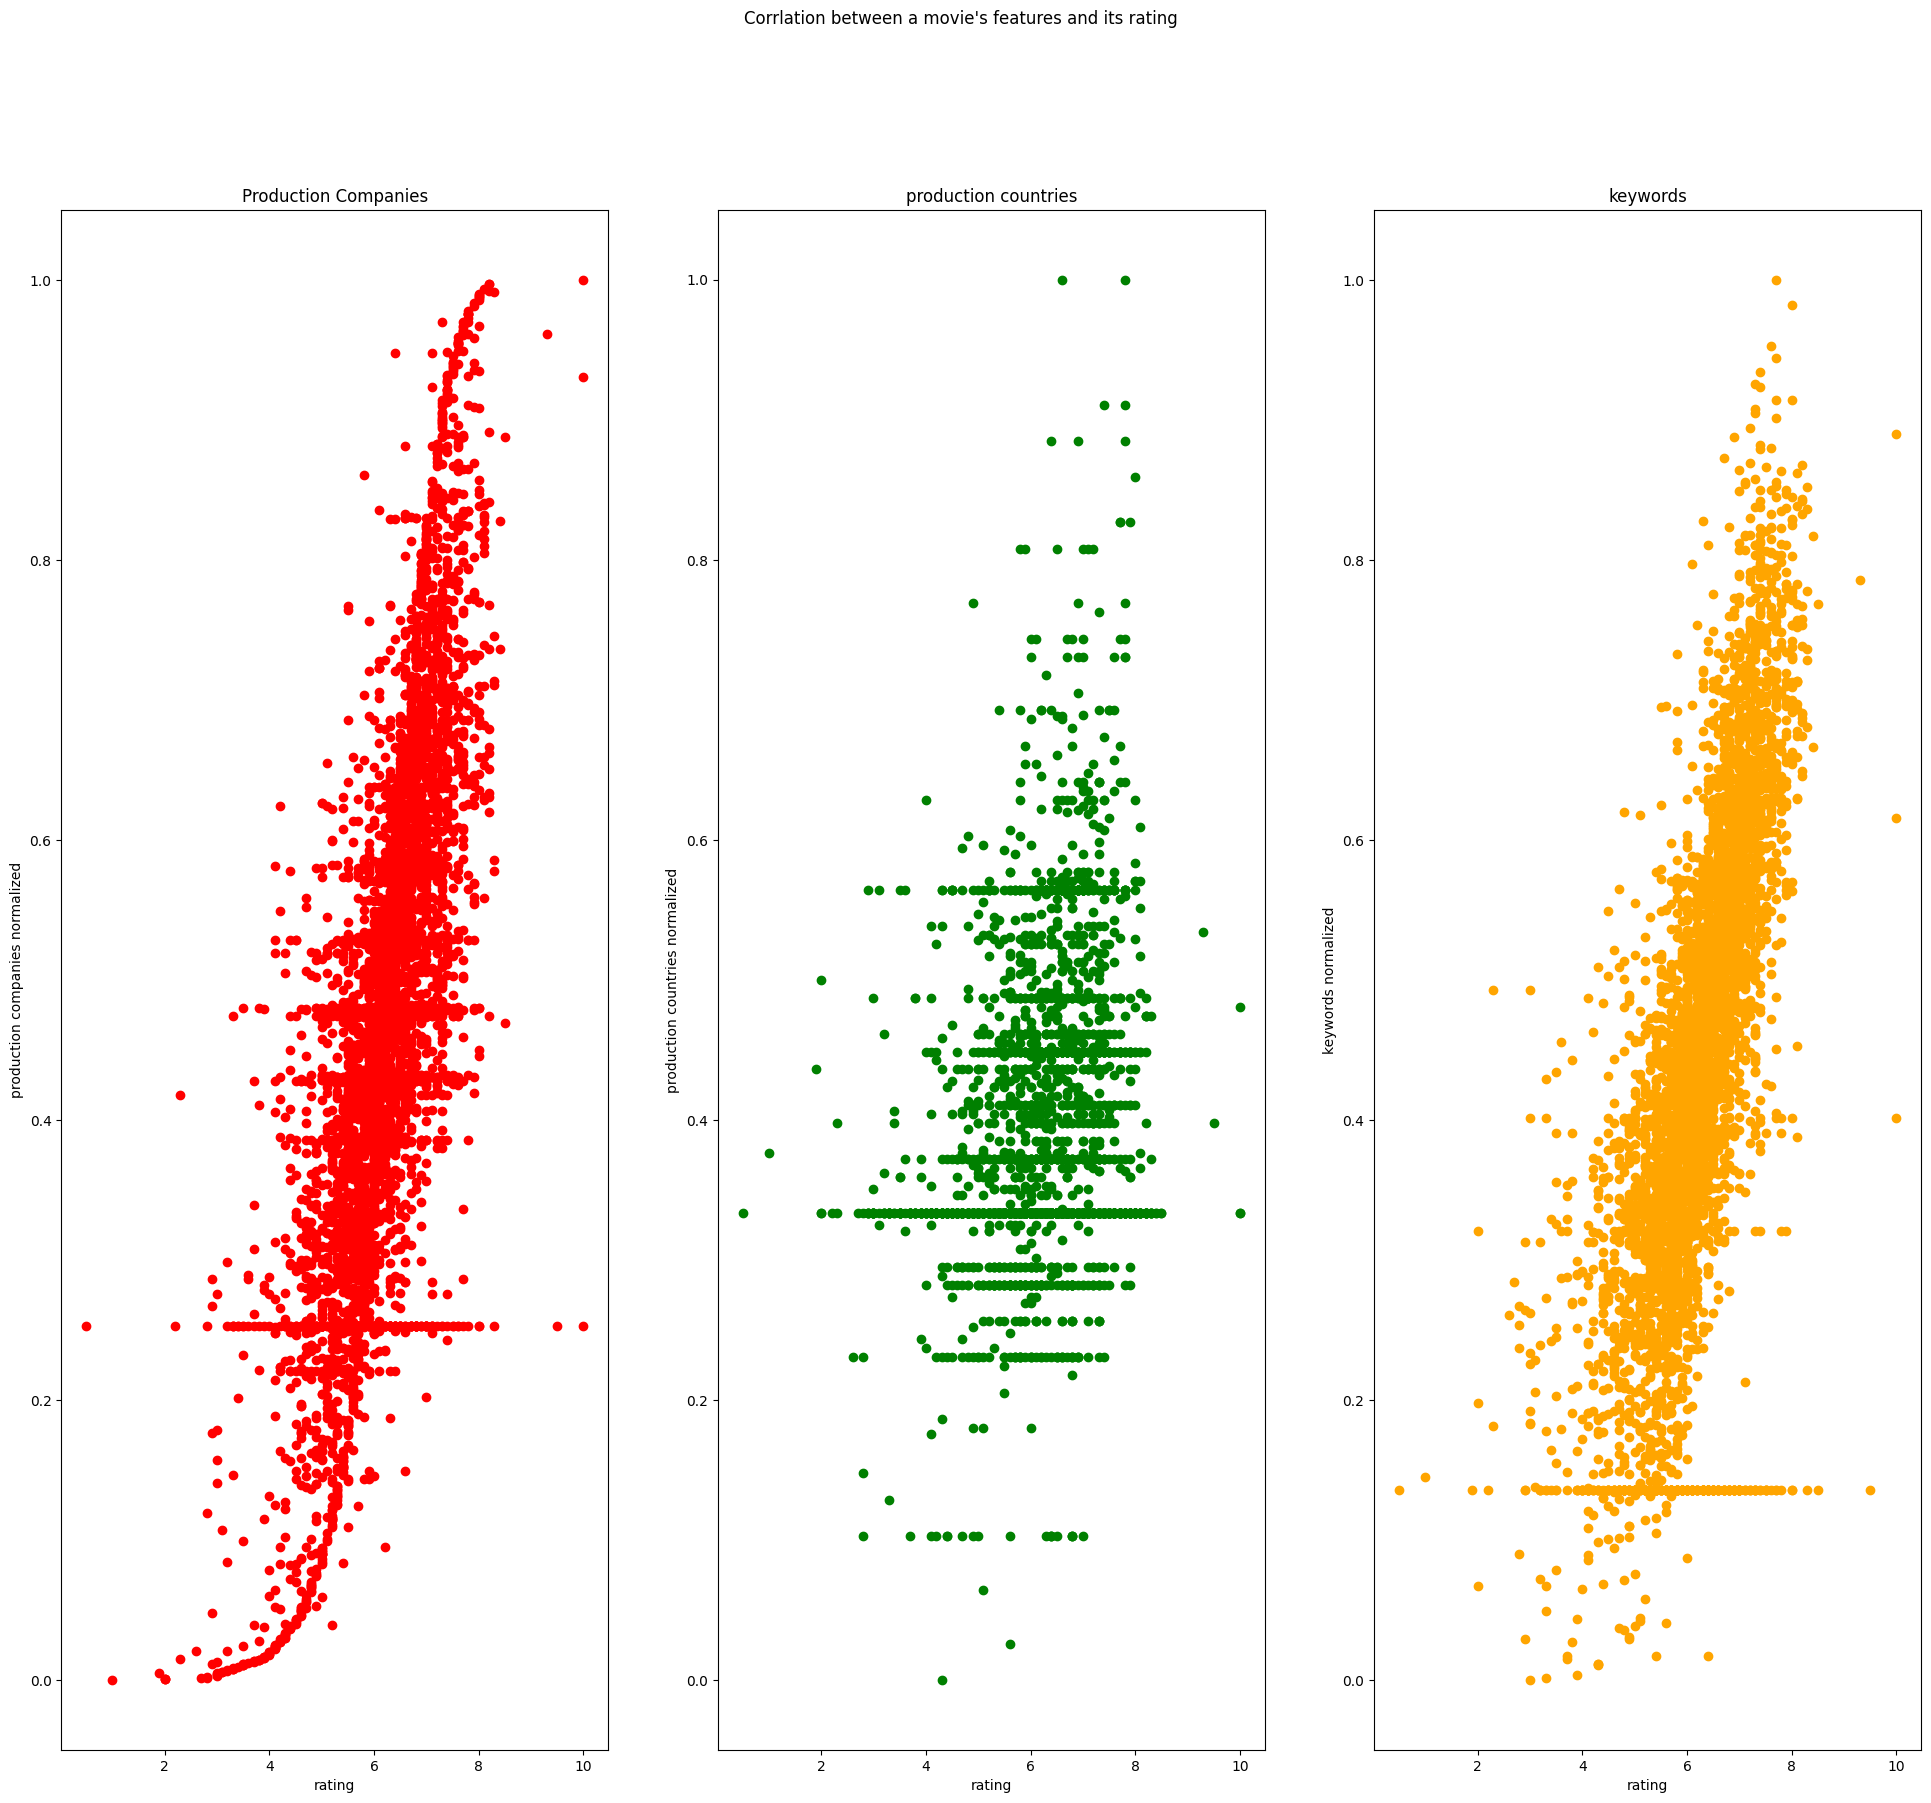

In [44]:
fig, ax = plt.subplots(1,3, figsize=(24,20))

ax[0].scatter(target_df['ratings'], feat_scaled['production_companies'], facecolor='red')
ax[0].set_xlabel('rating')
ax[0].set_ylabel('production companies normalized')
ax[0].set_title('Production Companies')

ax[1].scatter(target_df['ratings'], feat_scaled['production_countries'], facecolor='green')
ax[1].set_xlabel('rating')
ax[1].set_ylabel('production countries normalized')
ax[1].set_title('production countries')

ax[2].scatter(target_df['ratings'], feat_scaled['keywords'], facecolor='orange')
ax[2].set_xlabel('rating')
ax[2].set_ylabel('keywords normalized')
ax[2].set_title('keywords')

fig.suptitle("Corrlation between a movie's features and its rating")

In [45]:
from sklearn.model_selection import train_test_split
def train_test_val_split(df_feat, df_target, train_frac):
    train_features, test_features, train_target, test_target = train_test_split(df_feat, df_target, test_size = train_frac) #splitting training from rest of the dataset
    return (train_features, train_target), (test_features, test_target)

In [46]:
(features_train, target_train), (features_test, target_test) = train_test_val_split(feat_scaled, target_df,0.7)

In [47]:
target_train

,ratings
1240,6.4
1686,5.8
475,6.7
3834,7.1
2032,6.8
...,...
876,5.4
387,6.2
3426,5.1
3269,5.5


In [48]:
features_train

,production_companies,production_countries,keywords
1240,0.540330,0.448718,0.525361
1686,0.507919,0.448718,0.411357
475,0.470930,0.333333,0.418341
3834,0.479952,0.564103,0.451975
2032,0.614876,0.564103,0.600733
...,...,...,...
876,0.473737,0.333333,0.411051
387,0.431101,0.371795,0.391992
3426,0.469126,0.333333,0.410047
3269,0.573176,0.333333,0.320624


In [49]:
target_train.head()

,ratings
1240,6.4
1686,5.8
475,6.7
3834,7.1
2032,6.8


In [50]:
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR

In [51]:
reg = BayesianRidge()
reg.fit(features_train.values, target_train)

BayesianRidge()

In [57]:
svm=SVR()

svm.fit(features_train.values, target_train)
target_pred = svm.predict(features_test.values)

from sklearn.metrics import r2_score

score = r2_score(target_test, target_pred)

print("R^2 Score for predictions:", score)

errors = abs(target_pred - target_test['ratings'].values)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / target_test['ratings'].values)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

[[0.25280674 0.33333333 0.32062447]
 [0.02435846 0.33333333 0.12030586]
 [0.31525662 0.37179487 0.6248584 ]
 ...
 [0.22032879 0.33333333 0.31632328]
 [0.65306736 0.48717949 0.61366291]
 [0.58520449 0.33333333 0.43172525]]
R^2 Score for predictions: 0.681285912264364
Mean Absolute Error: 0.38 degrees.
Accuracy: 92.93 %.


In [53]:
target_pred = reg.predict(features_test.values)

Text(0.5, 1.0, 'Movie ratings vs Predicted ratings')

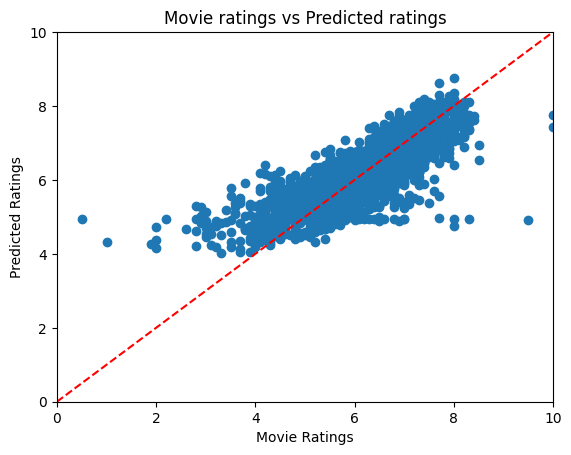

In [54]:
plt.axis([0,10,0,10])
plt.scatter(target_test, target_pred)

index_arr = [n for n in range(11)]
plt.plot(index_arr,'r--')             
plt.xlabel("Movie Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Movie ratings vs Predicted ratings")

In [55]:
from sklearn.metrics import r2_score

score = r2_score(target_test, target_pred)

print("R^2 Score for predictions:", score)

R^2 Score for predictions: 0.6527413932393007


In [56]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

model = Sequential()

# The Input Layer :
model.add(Dense(128, kernel_initializer='normal',input_dim = features_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

KeyboardInterrupt: 

In [ ]:
model.fit(features_train, target_train, epochs=500, batch_size=32, validation_split = 0.2)

Epoch 1/500


35/35 [==============================] - 1s 9ms/step - loss: 3.2931 - mean_absolute_error: 3.2931 - val_loss: 0.5241 - val_mean_absolute_error: 0.5241
Epoch 2/500
35/35 [==============================] - 0s 4ms/step - loss: 0.5165 - mean_absolute_error: 0.5165 - val_loss: 0.4814 - val_mean_absolute_error: 0.4814
Epoch 3/500
35/35 [==============================] - 0s 4ms/step - loss: 0.4641 - mean_absolute_error: 0.4641 - val_loss: 0.4468 - val_mean_absolute_error: 0.4468
Epoch 4/500
35/35 [==============================] - 0s 3ms/step - loss: 0.4563 - mean_absolute_error: 0.4563 - val_loss: 0.4205 - val_mean_absolute_error: 0.4205
Epoch 5/500
35/35 [==============================] - 0s 4ms/step - loss: 0.4512 - mean_absolute_error: 0.4512 - val_loss: 0.4161 - val_mean_absolute_error: 0.4161
Epoch 6/500
35/35 [==============================] - 0s 4ms/step - loss: 0.4357 - mean_absolute_error: 0.4357 - val_loss: 0.4351 - val_mean_absolute_error: 0.4351
Epoch 7/500
35/35 [=

In [ ]:
target_pred = model.predict(features_test.values)
from sklearn.metrics import r2_score

score = r2_score(target_test, target_pred)

print("R^2 Score for predictions:", score)

errors = abs(target_pred - target_test['ratings'].values)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / target_test['ratings'].values)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

101/101 [==============================] - 0s 1ms/step
R^2 Score for predictions: 0.6940857916098628
Mean Absolute Error: 0.95 degrees.
Accuracy: 83.14 %.
